# ***Import Library* yang akan digunakan**

Tahap awal dalam proses analisis ini dimulai dengan melakukan import library yang diperlukan. Library seperti pandas dan numpy digunakan untuk manipulasi dan analisis data, sementara matplotlib.pyplot dan seaborn digunakan untuk visualisasi. Modul dari scikit-learn digunakan untuk preprocessing, pembuatan pipeline, pemodelan, dan evaluasi performa model. Selain itu, digunakan juga XGBoost sebagai salah satu algoritma klasifikasi. warnings.filterwarnings('ignore') digunakan untuk menyembunyikan peringatan agar output tetap bersih, dan np.random.seed(42) ditetapkan untuk memastikan hasil yang konsisten pada setiap eksekusi.

In [1]:
# === Library Dasar ===
import numpy as np
import pandas as pd

# === Visualisasi ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Preprocessing dan Pipeline ===
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# === Model Selection dan Evaluasi ===
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    recall_score
)

# === Algoritma Pembelajaran Mesin ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# === Pengaturan Umum ===
import warnings
warnings.filterwarnings('ignore')

# === Reproducibility ===
np.random.seed(42)


# **Upload Dataset melalui Kaggle**

Kode pada bagian ini adalah serangkaian perintah yang digunakan di lingkungan Google Colab untuk mengunggah file kredensial Kaggle, mengunduh dataset dari Kaggle, mengekstrak file dataset, dan memuat serta menampilkan informasi dasar tentang dataset tersebut.

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadrozagi","key":"ff1d96f1b4b5d6189a62f31ffb41c5ed"}'}

Untuk mengakses data dari Kaggle, pertama dibuat direktori .kaggle jika belum ada. Kemudian, file kaggle.json disalin ke direktori tersebut dan diatur izin aksesnya agar hanya bisa dibaca oleh pemilik, guna menjaga keamanan kredensial.

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Perintah !kaggle datasets download -d mujtabamatin/air-quality-and-pollution-assessment digunakan untuk mengunduh dataset Air Quality and Pollution Assessment dari Kaggle menggunakan API. Setelah autentikasi berhasil, perintah ini akan menyimpan file dataset dalam format zip ke direktori kerja saat ini.

In [4]:
!kaggle datasets download -d mujtabamatin/air-quality-and-pollution-assessment

Dataset URL: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment
License(s): apache-2.0
  0% 0.00/84.1k [00:00<?, ?B/s]
100% 84.1k/84.1k [00:00<00:00, 229MB/s]


Perintah !unzip -q air-quality-and-pollution-assessment -d aqindex digunakan untuk mengekstrak file dataset yang telah diunduh sebelumnya. File ZIP akan diekstrak secara diam-diam (-q untuk quiet mode) ke dalam folder bernama aqindex.

In [5]:
!unzip -q air-quality-and-pollution-assessment -d aqindex

Perintah df = pd.read_csv('/content/aqindex/updated_pollution_dataset.csv') digunakan untuk membaca file dataset hasil ekstraksi ke dalam bentuk DataFrame menggunakan pandas. File updated_pollution_dataset.csv berada di dalam folder aqindex, dan hasil pembacaannya disimpan dalam variabel df untuk proses analisis lebih lanjut.

In [6]:
df=pd.read_csv('/content/aqindex/updated_pollution_dataset.csv')

Perintah df.info() digunakan untuk menampilkan informasi umum tentang struktur DataFrame, seperti jumlah baris dan kolom, nama kolom, tipe data di setiap kolom, serta jumlah nilai non-null (tidak hilang) pada masing-masing kolom.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


Perintah df.describe() digunakan untuk menampilkan statistik deskriptif dari kolom numerik dalam DataFrame, seperti mean, standar deviasi, nilai minimum, maksimum, serta kuartil (25%, 50%, 75%), yang membantu memahami sebaran data secara umum.

In [8]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


Perintah df.head(5) digunakan untuk menampilkan lima baris pertama dari DataFrame. Ini berguna untuk mendapatkan gambaran awal tentang struktur dan isi data, termasuk nama kolom dan contoh nilai di setiap kolom.

In [9]:
df.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


# **Exploratory Data Analysis**

 Pada tahap eksplorasi data ini, dilakukan analisis distribusi kategori kualitas udara menggunakan visualisasi diagram batang. Visualisasi ini bertujuan untuk melihat seberapa seimbang data pada setiap kategori, yaitu Good, Moderate, Poor, dan Hazardous. Grafik menunjukkan bahwa kategori Good merupakan yang paling dominan dalam dataset, diikuti oleh Moderate, Poor, dan Hazardous. Hal ini mengindikasikan bahwa sebagian besar pengamatan kualitas udara berada dalam kondisi baik hingga sedang, sementara kondisi yang buruk dan berbahaya jumlahnya relatif lebih sedikit. Visualisasi ini dibuat dengan menggunakan fungsi countplot dari library Seaborn, yang menampilkan frekuensi kemunculan masing-masing kategori dalam bentuk batang vertikal. Untuk memperjelas tampilan, ditambahkan elemen-elemen seperti judul grafik, label sumbu, rotasi teks pada sumbu-x, dan garis bantu (grid) horizontal pada sumbu-y. Analisis ini menjadi langkah awal yang penting untuk memahami persebaran kualitas udara dalam dataset sebelum masuk ke tahap pemodelan atau analisis lebih lanjut.

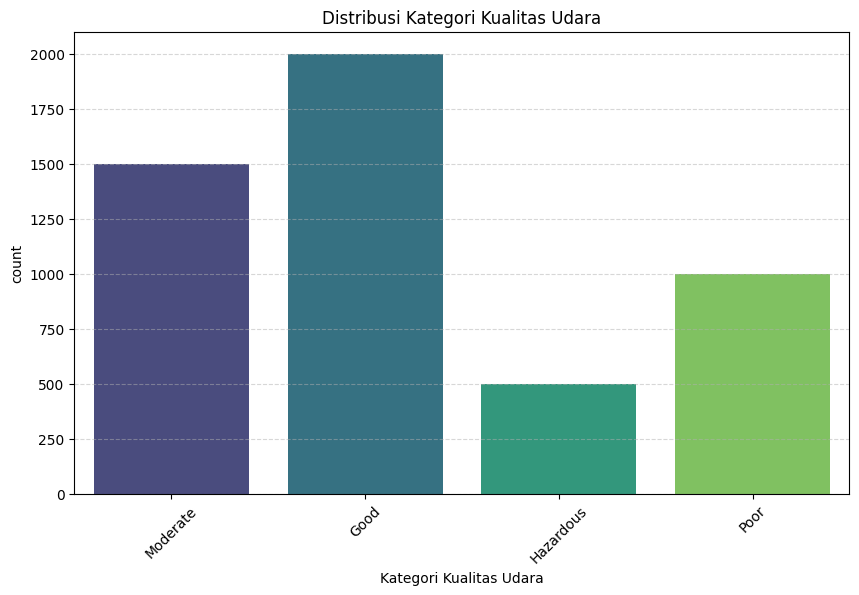

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Air Quality', data=df, palette='viridis')
plt.title('Distribusi Kategori Kualitas Udara')
plt.xlabel('Kategori Kualitas Udara')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insight:**
- Grafik distribusi menunjukkan bahwa sebagian besar kualitas udara berada pada kategori Good dan Moderate, sementara Poor dan Hazardous relatif sedikit. Ketidakseimbangan ini penting diperhatikan, terutama jika data akan digunakan untuk klasifikasi, karena bisa memengaruhi kinerja model. Temuan ini juga membuka peluang analisis lanjutan berdasarkan waktu atau lokasi.

Pada kode dibawah, dilakukan visualisasi distribusi untuk setiap fitur numerik dalam dataset menggunakan histogram. Fitur-fitur yang dianalisis meliputi Temperature, Humidity, PM2.5, PM10, NO2, SO2, CO, Proximity to Industrial Areas, dan Population Density. Histogram ini membantu memahami pola distribusi masing-masing variabel, apakah menyebar normal, skewed, atau memiliki outlier. Selain itu, grafik ini juga memberi gambaran awal mengenai variabilitas dan konsentrasi data pada setiap fitur, yang penting untuk proses prapemrosesan dan pemodelan selanjutnya.

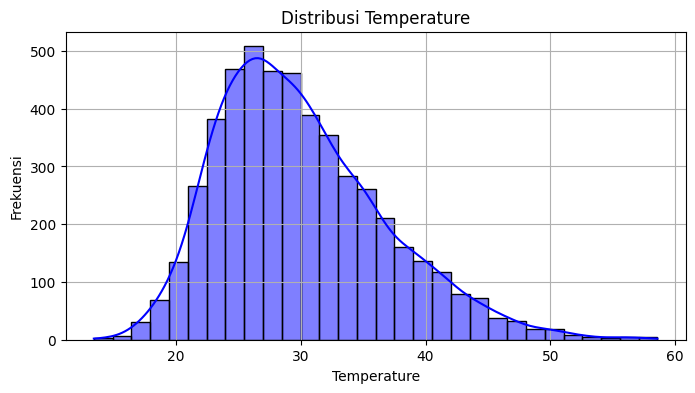

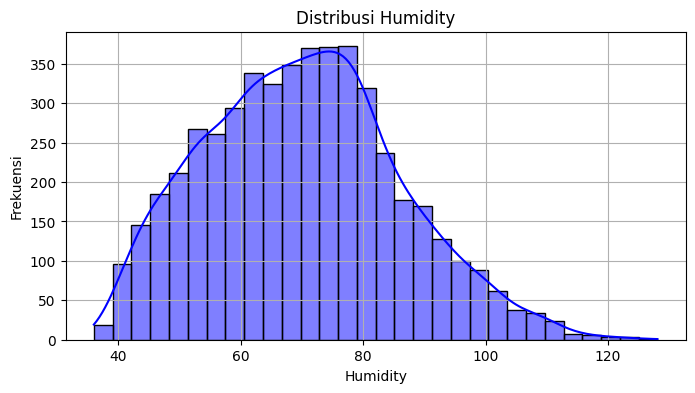

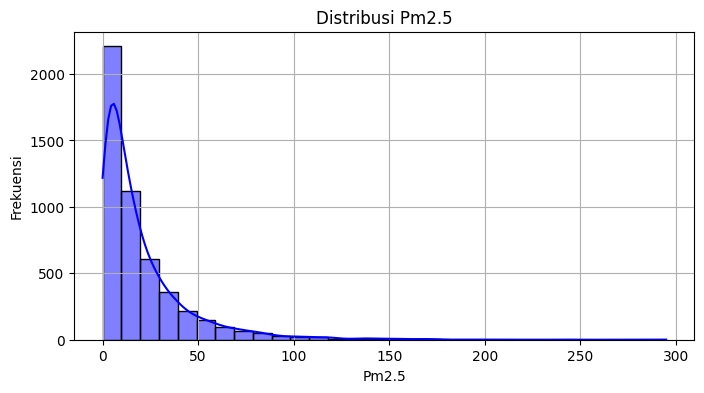

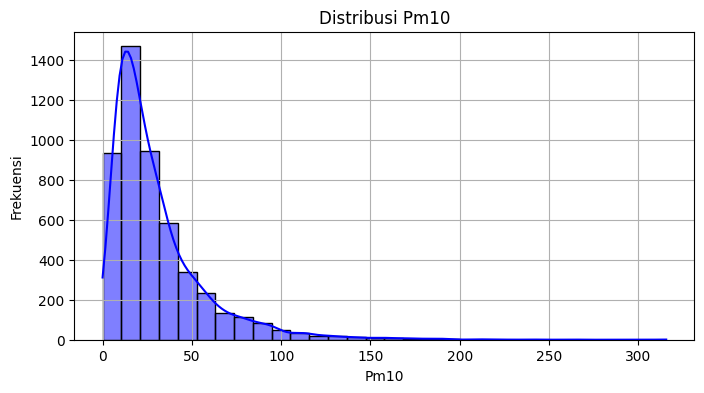

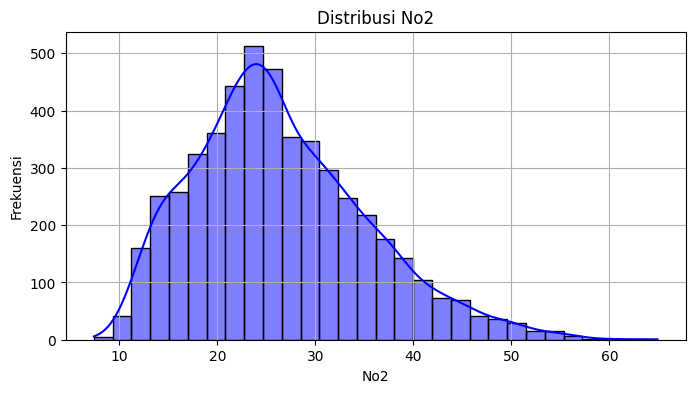

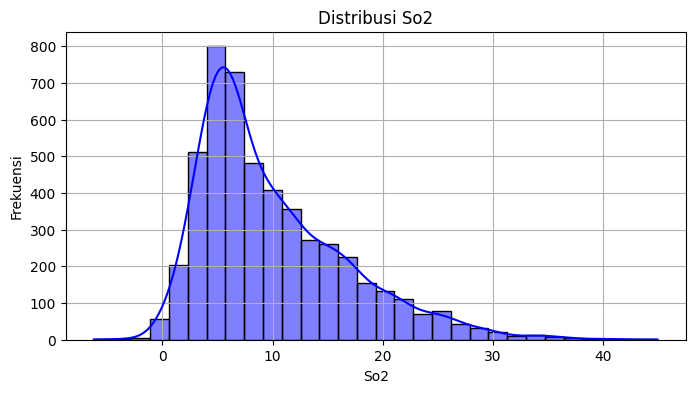

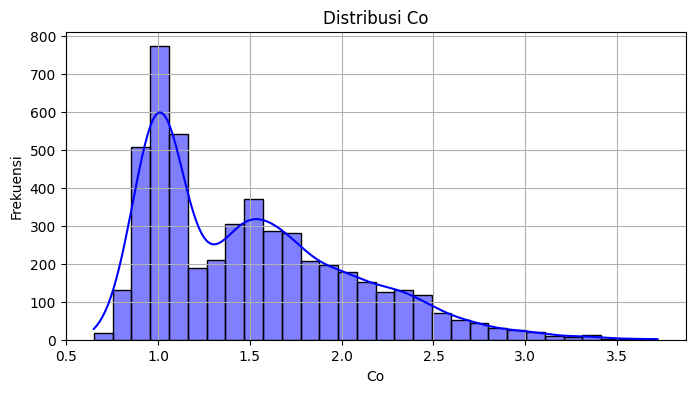

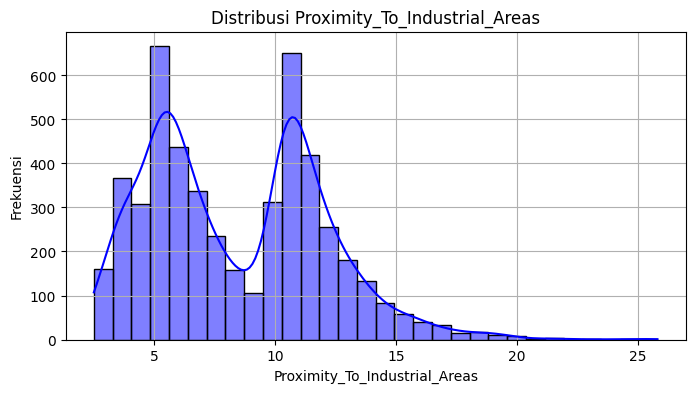

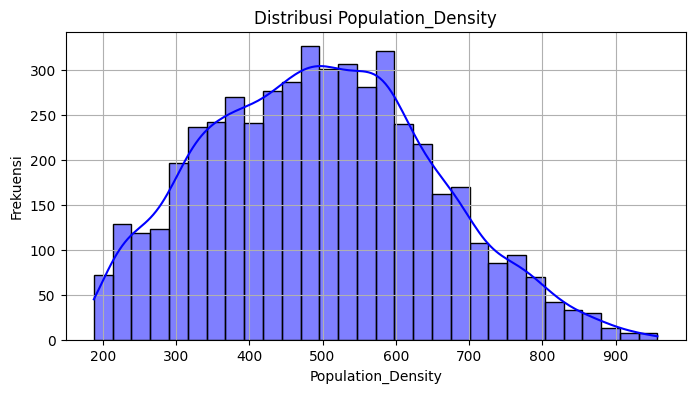

In [11]:
# Daftar kolom numerik
numerical_cols = [
    'Temperature',
    'Humidity',
    'PM2.5',
    'PM10',
    'NO2',
    'SO2',
    'CO',
    'Proximity_to_Industrial_Areas',
    'Population_Density'
]

# Plot histogram untuk setiap fitur numerik
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col.replace("(", "").replace(")", "").replace("-", " ").title()}')
    plt.xlabel(f'{col.replace("(", "").replace(")", "").replace("-", " ").title()}')
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()

**Insight:**
- Berdasarkan visualisasi distribusi fitur numerik, sebagian besar variabel seperti PM2.5, PM10, SO2, dan CO menunjukkan sebaran yang condong ke kanan (right-skewed), menandakan adanya nilai ekstrem tinggi. Sementara itu, Temperature, Humidity, NO2, dan Population Density memiliki distribusi yang cenderung normal atau mendekatinya. Fitur Proximity to Industrial Areas tampak memiliki distribusi bimodal, yang mengindikasikan kemungkinan adanya dua kelompok wilayah dengan jarak yang berbeda terhadap kawasan industri. Insight ini penting untuk pertimbangan transformasi data dan deteksi outlier sebelum pemodelan.

Pada kode dibawah dilakukan Visualisasi matriks korelasi untuk menunjukkan hubungan antar fitur numerik dalam dataset. Beberapa variabel tampak memiliki korelasi yang cukup kuat, baik positif maupun negatif.

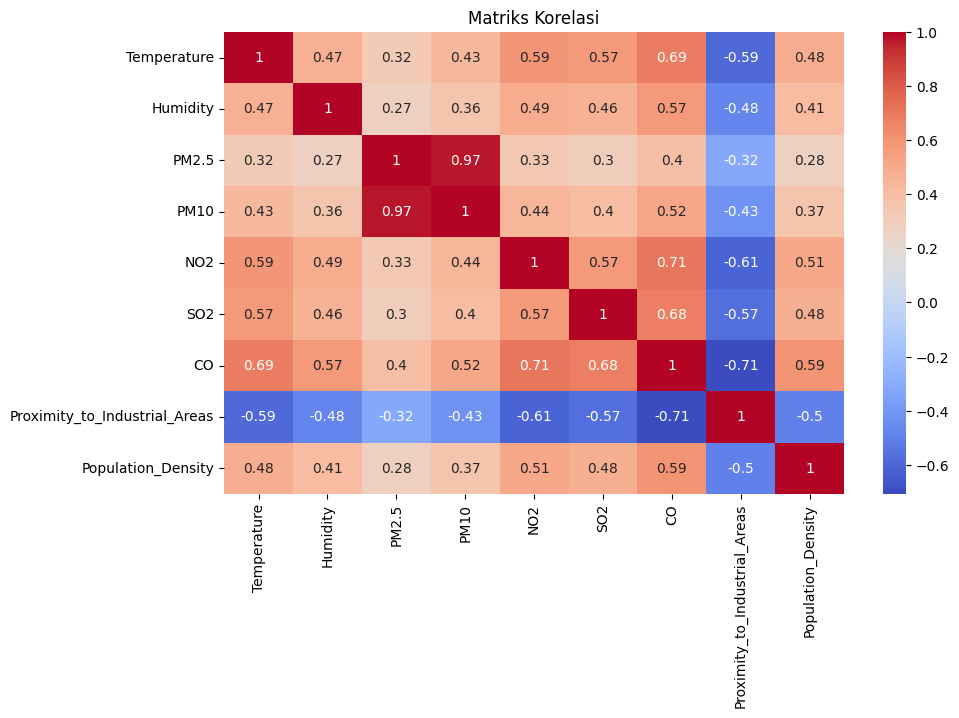

In [12]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

**Insight:**
- Berdasarkan matriks korelasi, terlihat bahwa terdapat hubungan yang sangat kuat antara PM2.5 dan PM10, menunjukkan bahwa kedua polutan ini cenderung meningkat bersamaan, kemungkinan berasal dari sumber emisi yang sama. CO juga memiliki korelasi yang cukup tinggi dengan NO2 dan SO2,

# ***Data Cleaning***

Sebelum masuk ke tahap analisis lebih lanjut, dilakukan proses data cleaning untuk memastikan kualitas data yang digunakan. Tahap ini mencakup identifikasi dan penanganan data yang hilang (missing values), duplikasi data, serta deteksi nilai-nilai yang tidak wajar atau outlier yang dapat mempengaruhi hasil analisis. Selain itu, dilakukan juga pengecekan tipe data untuk memastikan kesesuaian antara tipe data dan nilai yang dikandungnya. Langkah-langkah ini penting untuk menjamin bahwa data yang digunakan dalam pemodelan atau visualisasi selanjutnya bersih, konsisten, dan siap untuk diolah.

Kode dibawah untuk mengecek apakah ada data yang kosong perkolom

In [13]:
print(df.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


Kode dibawah untuk mengecek apakah ada data yang duplikasi

In [14]:
duplicate_count = df.duplicated().sum()
print("\nJumlah baris duplikat:", duplicate_count)


Jumlah baris duplikat: 0


Kode dibawah merupakan kode untuk cek outlier

In [15]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

In [16]:
print("\nJumlah Outlier per Kolom:")
for col in numerical_cols:
    outlier_count = detect_outliers(df, col)
    print(f"{col}: {outlier_count} outlier")


Jumlah Outlier per Kolom:
Temperature: 72 outlier
Humidity: 19 outlier
PM2.5: 352 outlier
PM10: 324 outlier
NO2: 73 outlier
SO2: 124 outlier
CO: 45 outlier
Proximity_to_Industrial_Areas: 16 outlier
Population_Density: 7 outlier


**Insight:**
- Dari analisis outlier pada data kualitas udara, ditemukan nilai ekstrem terutama pada variabel PM2.5, PM10, dan NO2, yang menunjukkan kemungkinan adanya lonjakan polusi pada waktu atau lokasi tertentu. Outlier juga muncul pada variabel lingkungan seperti Temperature dan Humidity, yang bisa mencerminkan kondisi cuaca ekstrem. Dalam konteks kualitas udara, outlier ini tidak selalu menunjukkan kesalahan, melainkan bisa menjadi indikasi kejadian penting dan sesudah tadi melihat di bagian EDA jadi diputuskan untuk tidak dihapus berhubungan model yang dibangun juga cukup robust terhadap outlier

In [17]:
print(df)

      Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2                               5

# ***Data Split***

Setelah melalui tahap pembersihan data (data cleaning) yang mencakup penanganan missing values dan deteksi outlier, langkah selanjutnya adalah mempersiapkan data untuk proses pelatihan model. Pada tahap ini, dilakukan pemisahan antara fitur dan target variabel. Kolom 'Air Quality' dipilih sebagai target karena merepresentasikan kualitas udara yang ingin diprediksi. Sementara itu, seluruh kolom lainnya digunakan sebagai fitur atau variabel independen yang menjadi input bagi model. Pada kode dibawah juga terdapat encoding terhadap fitur target agar menjadi numerik supaya dapat diproses oleh algoritma

In [18]:
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

# Label encoding untuk target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42) = Membagi data menjadi set latih (80%) dan uji (20%) dengan seed acak 42

In [19]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

- print("Ukuran X_train:", X_train.shape) = Menampilkan dimensi set fitur latih

- print("Ukuran X_test:", X_test.shape) = Menampilkan dimensi set fitur uji

- print("Ukuran y_train:", y_train.shape) = Menampilkan dimensi set label latih

- print("Ukuran y_test:", y_test.shape) = Menampilkan dimensi set label uji

In [20]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (4000, 9)
Ukuran X_test: (1000, 9)
Ukuran y_train: (4000,)
Ukuran y_test: (1000,)


# **Modeling dengan Random Forest, XGBoost dan SVM**

Setelah data selesai diproses dan siap digunakan, tahap selanjutnya adalah pemodelan menggunakan tiga algoritma klasifikasi: Random Forest, XGBoost, dan Support Vector Machine (SVM). Masing-masing model dibangun dalam bentuk pipeline yang mencakup proses standardisasi data menggunakan StandardScaler, diikuti oleh algoritma klasifikasi yang sesuai. Penggunaan pipeline bertujuan untuk menyederhanakan alur preprocessing dan training model, sekaligus memastikan proses yang konsisten dan efisien selama evaluasi dan pengujian.

In [21]:
# === 2. BUAT PIPELINE UNTUK MASING-MASING MODEL ===

# a. Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# b. XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        n_estimators=600,
        max_depth=15,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    ))
])

# c. SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))
])


## **Evaluasi**

Setelah model dilatih, tahap berikutnya adalah melakukan evaluasi performa untuk menilai seberapa baik masing-masing model dalam memprediksi kualitas udara. Proses evaluasi dilakukan menggunakan fungsi evaluate_model, yang menghitung metrik seperti accuracy, F1 score, dan recall. Selain itu, ditampilkan juga classification report serta confusion matrix dalam bentuk visual untuk memberikan gambaran detail mengenai performa model terhadap setiap kelas target. Evaluasi ini dilakukan secara konsisten untuk semua pipeline model yang telah dibangun sebelumnya.

In [22]:
# === 3. FUNGSI UNTUK EVALUASI MODEL ===

def evaluate_model(pipeline, model_name):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"\n=== {model_name} ===")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()


Pada kode dibawah dilakukan pemanggilan fungsi evaluasi yang sudah kita buat diatas


=== Random Forest ===
Accuracy: 0.96
F1 Score: 0.9600109310950614
Recall: 0.96
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.88      0.90       111
    Moderate       0.97      0.97      0.97       294
        Poor       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



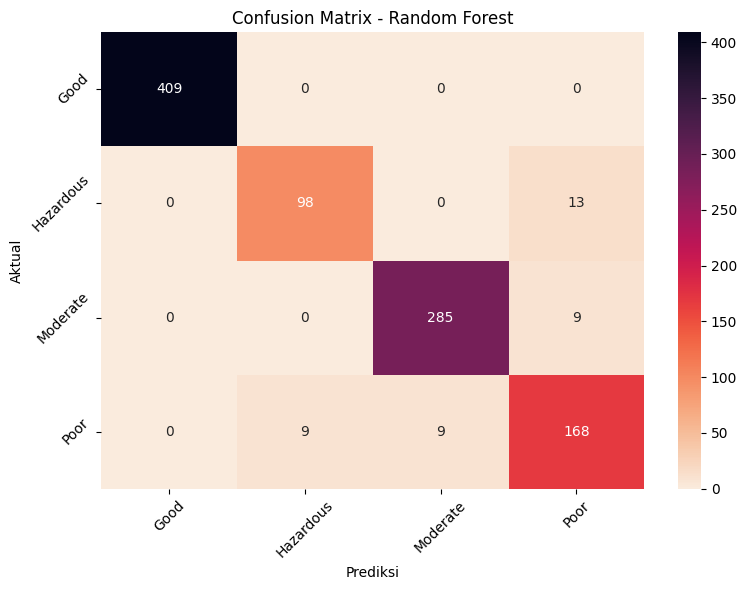


=== XGBoost ===
Accuracy: 0.961
F1 Score: 0.9611411745428207
Recall: 0.961
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.93      0.90      0.92       111
    Moderate       0.97      0.96      0.96       294
        Poor       0.88      0.91      0.90       186

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



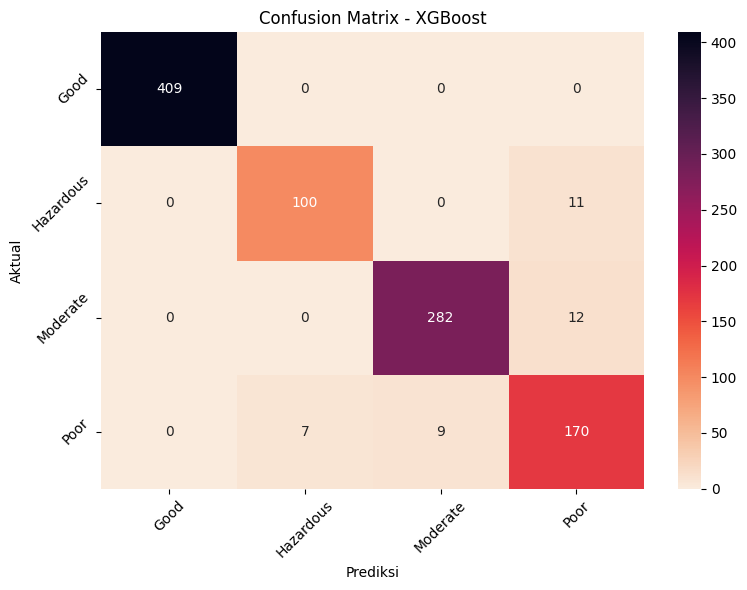


=== Support Vector Machine (SVM) ===
Accuracy: 0.942
F1 Score: 0.9418998771312675
Recall: 0.942
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.89      0.81      0.85       111
    Moderate       0.95      0.96      0.96       294
        Poor       0.83      0.87      0.85       186

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



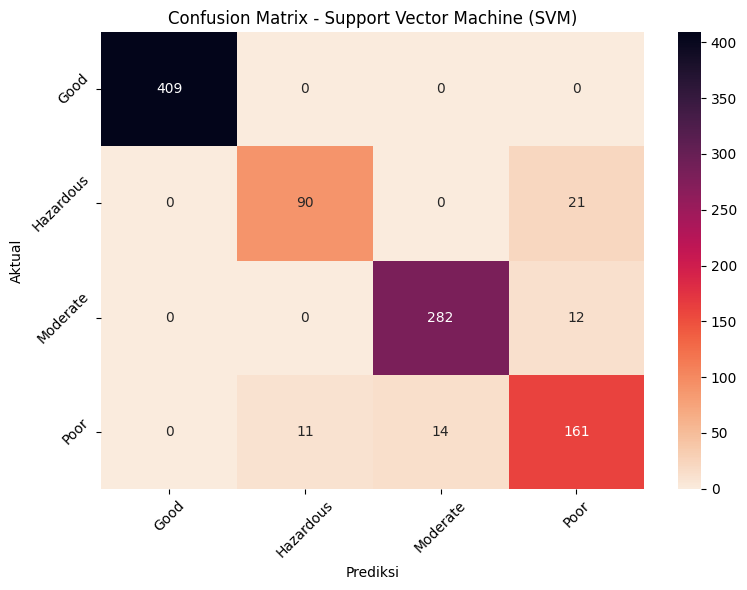

In [23]:
evaluate_model(rf_pipeline, "Random Forest")
evaluate_model(xgb_pipeline, "XGBoost")
evaluate_model(svm_pipeline, "Support Vector Machine (SVM)")

In [24]:
from sklearn.metrics import precision_score, roc_auc_score

# Prediksi
y_pred_rf = rf_pipeline.fit(X_train, y_train).predict(X_test)
y_pred_xgb = xgb_pipeline.fit(X_train, y_train).predict(X_test)
y_pred_svm = svm_pipeline.fit(X_train, y_train).predict(X_test)

# Inisialisasi tabel evaluasi
model_scores = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc'],
                            columns=['RandomForest', 'XGBoost', 'SVM'])

# Random Forest
model_scores.loc['accuracy', 'RandomForest'] = accuracy_score(y_test, y_pred_rf)
model_scores.loc['precision', 'RandomForest'] = precision_score(y_test, y_pred_rf, average='weighted')
model_scores.loc['recall', 'RandomForest'] = recall_score(y_test, y_pred_rf, average='weighted')
model_scores.loc['f1_score', 'RandomForest'] = f1_score(y_test, y_pred_rf, average='weighted')
model_scores.loc['roc_auc', 'RandomForest'] = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test), multi_class='ovr', average='weighted')

# XGBoost
model_scores.loc['accuracy', 'XGBoost'] = accuracy_score(y_test, y_pred_xgb)
model_scores.loc['precision', 'XGBoost'] = precision_score(y_test, y_pred_xgb, average='weighted')
model_scores.loc['recall', 'XGBoost'] = recall_score(y_test, y_pred_xgb, average='weighted')
model_scores.loc['f1_score', 'XGBoost'] = f1_score(y_test, y_pred_xgb, average='weighted')
model_scores.loc['roc_auc', 'XGBoost'] = roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test), multi_class='ovr', average='weighted')

# SVM
model_scores.loc['accuracy', 'SVM'] = accuracy_score(y_test, y_pred_svm)
model_scores.loc['precision', 'SVM'] = precision_score(y_test, y_pred_svm, average='weighted')
model_scores.loc['recall', 'SVM'] = recall_score(y_test, y_pred_svm, average='weighted')
model_scores.loc['f1_score', 'SVM'] = f1_score(y_test, y_pred_svm, average='weighted')
model_scores.loc['roc_auc', 'SVM'] = roc_auc_score(y_test, svm_pipeline.predict_proba(X_test), multi_class='ovr', average='weighted')

# Tampilkan hasil akhir
print("Hasil Evaluasi Model Klasifikasi:")
display(model_scores)


Hasil Evaluasi Model Klasifikasi:


,RandomForest,XGBoost,SVM
accuracy,0.96,0.961,0.942
precision,0.960127,0.96148,0.942366
recall,0.96,0.961,0.942
f1_score,0.960011,0.961141,0.9419
roc_auc,0.996742,0.99663,0.995169


## Inferensi

Setelah model dievaluasi dan menunjukkan performa yang baik, dilakukan tahap inferensi untuk menguji kemampuan model dalam memprediksi kualitas udara pada data baru. Tiga sampel data (test_samples) dengan nilai parameter lingkungan yang berbeda diuji menggunakan ketiga model: Random Forest, XGBoost, dan SVM. Setiap model memberikan prediksi kategori kualitas udara berdasarkan fitur-fitur seperti suhu, kelembapan, konsentrasi polutan (PM2.5, PM10, NO2, SO2, CO), kedekatan dengan area industri, dan kepadatan penduduk. Hasil prediksi kemudian dikembalikan ke bentuk label asli untuk interpretasi yang lebih mudah.

In [25]:
# === TEST DATA BARU ===
test_samples = [
    [30.2, 62.0, 7.1, 18.0, 22.0, 10.0, 1.70, 6.2, 400],
    [24.5, 55.0, 4.0, 10.0, 10.5, 4.5, 1.00, 12.0, 280],
    [33.0, 80.0, 55.0, 100.0, 45.0, 20.0, 2.50, 3.5, 850],
]
feature_names = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
x_test_new = pd.DataFrame(test_samples, columns=feature_names)

# === PREDIKSI DENGAN RANDOM FOREST ===
pred_rf = rf_pipeline.predict(x_test_new)
pred_rf_labels = le.inverse_transform(pred_rf)
print("=== Random Forest Predictions ===")
for i, label in enumerate(pred_rf_labels):
    print(f"Data uji ke-{i+1}: {x_test_new.iloc[i].to_dict()}")
    print(f"Prediksi Kategori Kualitas Udara (RF): {label}\n")

=== Random Forest Predictions ===
Data uji ke-1: {'Temperature': 30.2, 'Humidity': 62.0, 'PM2.5': 7.1, 'PM10': 18.0, 'NO2': 22.0, 'SO2': 10.0, 'CO': 1.7, 'Proximity_to_Industrial_Areas': 6.2, 'Population_Density': 400.0}
Prediksi Kategori Kualitas Udara (RF): Moderate

Data uji ke-2: {'Temperature': 24.5, 'Humidity': 55.0, 'PM2.5': 4.0, 'PM10': 10.0, 'NO2': 10.5, 'SO2': 4.5, 'CO': 1.0, 'Proximity_to_Industrial_Areas': 12.0, 'Population_Density': 280.0}
Prediksi Kategori Kualitas Udara (RF): Good

Data uji ke-3: {'Temperature': 33.0, 'Humidity': 80.0, 'PM2.5': 55.0, 'PM10': 100.0, 'NO2': 45.0, 'SO2': 20.0, 'CO': 2.5, 'Proximity_to_Industrial_Areas': 3.5, 'Population_Density': 850.0}
Prediksi Kategori Kualitas Udara (RF): Hazardous



In [26]:
# === PREDIKSI DENGAN XGBOOST ===
pred_xgb = xgb_pipeline.predict(x_test_new)
pred_xgb_labels = le.inverse_transform(pred_xgb)
print("=== XGBoost Predictions ===")
for i, label in enumerate(pred_xgb_labels):
    print(f"Data uji ke-{i+1}: {x_test_new.iloc[i].to_dict()}")
    print(f"Prediksi Kategori Kualitas Udara (XGB): {label}\n")

=== XGBoost Predictions ===
Data uji ke-1: {'Temperature': 30.2, 'Humidity': 62.0, 'PM2.5': 7.1, 'PM10': 18.0, 'NO2': 22.0, 'SO2': 10.0, 'CO': 1.7, 'Proximity_to_Industrial_Areas': 6.2, 'Population_Density': 400.0}
Prediksi Kategori Kualitas Udara (XGB): Moderate

Data uji ke-2: {'Temperature': 24.5, 'Humidity': 55.0, 'PM2.5': 4.0, 'PM10': 10.0, 'NO2': 10.5, 'SO2': 4.5, 'CO': 1.0, 'Proximity_to_Industrial_Areas': 12.0, 'Population_Density': 280.0}
Prediksi Kategori Kualitas Udara (XGB): Good

Data uji ke-3: {'Temperature': 33.0, 'Humidity': 80.0, 'PM2.5': 55.0, 'PM10': 100.0, 'NO2': 45.0, 'SO2': 20.0, 'CO': 2.5, 'Proximity_to_Industrial_Areas': 3.5, 'Population_Density': 850.0}
Prediksi Kategori Kualitas Udara (XGB): Hazardous



In [27]:
# === PREDIKSI DENGAN SVM ===
pred_svm = svm_pipeline.predict(x_test_new)
pred_svm_labels = le.inverse_transform(pred_svm)
print("=== SVM Predictions ===")
for i, label in enumerate(pred_svm_labels):
    print(f"Data uji ke-{i+1}: {x_test_new.iloc[i].to_dict()}")
    print(f"Prediksi Kategori Kualitas Udara (SVM): {label}\n")

=== SVM Predictions ===
Data uji ke-1: {'Temperature': 30.2, 'Humidity': 62.0, 'PM2.5': 7.1, 'PM10': 18.0, 'NO2': 22.0, 'SO2': 10.0, 'CO': 1.7, 'Proximity_to_Industrial_Areas': 6.2, 'Population_Density': 400.0}
Prediksi Kategori Kualitas Udara (SVM): Moderate

Data uji ke-2: {'Temperature': 24.5, 'Humidity': 55.0, 'PM2.5': 4.0, 'PM10': 10.0, 'NO2': 10.5, 'SO2': 4.5, 'CO': 1.0, 'Proximity_to_Industrial_Areas': 12.0, 'Population_Density': 280.0}
Prediksi Kategori Kualitas Udara (SVM): Good

Data uji ke-3: {'Temperature': 33.0, 'Humidity': 80.0, 'PM2.5': 55.0, 'PM10': 100.0, 'NO2': 45.0, 'SO2': 20.0, 'CO': 2.5, 'Proximity_to_Industrial_Areas': 3.5, 'Population_Density': 850.0}
Prediksi Kategori Kualitas Udara (SVM): Hazardous

